In [1]:
'''
Reproduces EXAMPLE_compare_with_OS11.py
'''
from cgisim_sims import cgisim_sims
import cgisim
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import numpy as np
import proper
import roman_phasec_proper
import pandas as pd
from scipy.interpolate import interp1d

## Run EXAMPLE_compare_with_OS11.py from CGISim_sims examples:

In [2]:
cgisim_obj = cgisim_sims() # create cgisim_sims object

In [3]:
name_scene = 'example_comparing2OS11'
# Set up DMs
dm1 = proper.prop_fits_read(roman_phasec_proper.lib_dir + '/examples/hlc_best_contrast_dm1.fits')
dm2 = proper.prop_fits_read(roman_phasec_proper.lib_dir + '/examples/hlc_best_contrast_dm2.fits')
cgisim_obj.options['dm1'] = dm1
cgisim_obj.options['dm2'] = dm2

In [4]:
# Read in jitter and Z4-11 timeseries from OS11 file
datadir_Z411 = "/Users/sammyh/Codes/cgisim_sims/data/hlc_os11_v2/"
flnm_Z411 = 'hlc_os11_inputs.fits'
inFile = pyfits.open(datadir_Z411 + flnm_Z411)
hlc_os11_inputs = inFile[0].data # ndarray of values

Text(0, 0.5, 'mas RMS jitter')

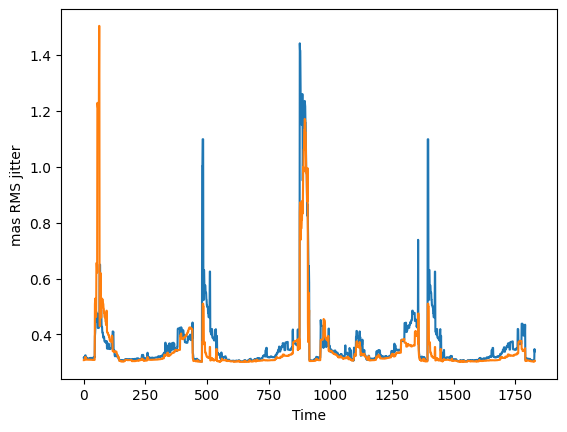

In [5]:
# Retrieve jitter values
jitt_sig_x_arr = hlc_os11_inputs[:,78] * 1 # masRMS
jitt_sig_y_arr = hlc_os11_inputs[:,79] * 1 # masRMS
# plot jitter
plt.figure(111)
plt.plot(jitt_sig_x_arr, label='x')
plt.plot(jitt_sig_y_arr, label='y')
plt.xlabel('Time')
plt.ylabel('mas RMS jitter')

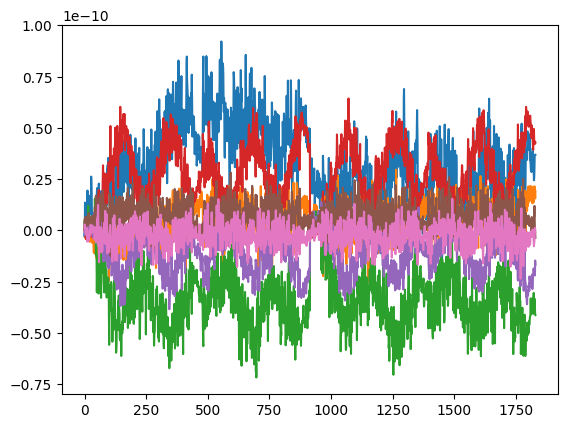

In [6]:
# retrieve Z4-11 values --- ? What exactly is this ? low-order wavefront errors (jitter (tip/tilt), etc.)
z411_mat = hlc_os11_inputs[:,46:54]
plt.figure(112)
for II in range(11-4):
    plt.plot(z411_mat[:,II])

In [7]:
# Set extra stuff from OS11
dm1_ztilt_deg = 0
dm2_ztilt_deg = 0
dm_sampling_m = 0.9906e-3   # actuator spacing in meters
dm_offset = 0.14e-3/dm_sampling_m
dm1_xc_act = 23.5# + dm_offset        
dm1_yc_act = 23.5         
dm2_xc_act = 23.5# - dm_offset
dm2_yc_act = 23.5         
fpm_x_offset_m =0# 0.82e-6          # FPM x,y offset in meters
fpm_y_offset_m = 0
fpm_z_shift_m = 0#70e-6           # occulter offset in meters along optical axis (+ = away from prior optics)

passvalue_proper = {'dm1_ztilt_deg':dm1_ztilt_deg,
                    'dm2_ztilt_deg':dm2_ztilt_deg,
                    'dm1_xc_act':dm1_xc_act,
                    'dm1_yc_act':dm1_yc_act,
                    'dm2_xc_act':dm2_xc_act,
                    'dm2_yc_act':dm2_yc_act,
                    'fpm_x_offset_m':fpm_x_offset_m,
                    'fpm_y_offset_m':fpm_y_offset_m,
                    'fpm_z_shift_m':fpm_z_shift_m} # parameter structure to pass to proper

In [8]:
# Create scene with low-order errors
cgisim_obj.generate_scene(name=name_scene, jitter_x=jitt_sig_x_arr, jitter_y=jitt_sig_y_arr, 
                         zindex=np.arange(4,11+1), zval_m=z411_mat, passvalue_proper=passvalue_proper)
# ? What is z index and why is it set like this?

In [9]:
# change number of timesteps
cgisim_obj.scene['num_timesteps'] = 3

# Generate speckle series for scene
cgisim_obj.generate_speckleSeries_from_scene(num_images_printed=0)

Starting the simulation of scene 'example_comparing2OS11'
Computing image num. 1 out of 1830
Computing fields 1 to 7 of 7


Process SpawnPoolWorker-2:
Process SpawnPoolWorker-4:
Process SpawnPoolWorker-7:
Process SpawnPoolWorker-6:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-1:
Process SpawnPoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/sammyh/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/sammyh/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/sammyh/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/sammyh/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/sammyh/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  F

KeyboardInterrupt: 

end EXAMPLE_compare_with_OS11.py

## EXAMPLE_generateOneImage.py:

In [9]:
cgisim_obj = cgisim_sims()
if True:
    dm1 = proper.prop_fits_read( roman_phasec_proper.lib_dir + "/examples/hlc_best_contrast_dm1.fits")
    dm2 = proper.prop_fits_read( roman_phasec_proper.lib_dir + "/examples/hlc_best_contrast_dm2.fits")
    cgisim_obj.options['dm1'] = dm1
    cgisim_obj.options['dm2'] = dm2
    
stellar_diameter = 4 #mas
cgisim_obj.sources[0]['star_vmag'] = 5.04
cgisim_obj.sources[0]['star_type'] = 'g0v'
cgisim_obj.sources[0]['name'] ='47Uma'
cgisim_obj.sources[0]['stellar_diameter'] = stellar_diameter

In [10]:
img = cgisim_obj.generate_image(source_id = 0, flag_return_contrast=True, jitter_sig_x=0.3,
                                jitter_sig_y=0.1, use_fpm=1, zindex=None, zval_m=None,
                                passvalue_proper=None, use_emccd=False, exptime=1.0)

Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.3 minutes.
Total time to compute =    0.3 minutes.
Computing normalization factor
Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.3 minutes.
Total time to compute =    0.3 minutes.
Reading in the jitter parameters and EFs into a cube


In [11]:
stellar_diameter = 5 #mas
cgisim_obj.sources[0]['star_vmag'] = 2.04
cgisim_obj.sources[0]['star_type'] = 'g0v'
cgisim_obj.sources[0]['name'] ='arbitrary'
cgisim_obj.sources[0]['stellar_diameter'] = stellar_diameter

img2 = cgisim_obj.generate_image(source_id = 0, flag_return_contrast=True, jitter_sig_x=0.3,
                                jitter_sig_y=0.1, use_fpm=1, zindex=None, zval_m=None,
                                passvalue_proper=None, use_emccd=False, exptime=1.0)

Computing fields 1 to 7 of 7
Time to compute 7 fields =    0.3 minutes.
Total time to compute =    0.3 minutes.


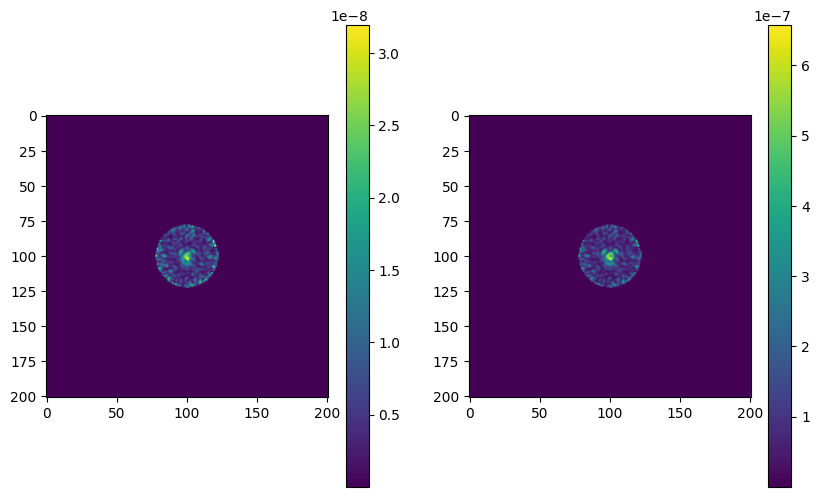

In [12]:
plt.figure(1, figsize=(10,6))
plt.subplot(121)
plt.imshow(img)
plt.colorbar()

plt.subplot(122)
plt.imshow(img2)
plt.colorbar()

end EXAMPLE_generateOneImage.py

# CGISim

### Look at CGISim cgisim_renormalize_spectrum module:

**Questions**
1. What units are spectral files given in?
    - Options given in cgisim_read_spectrum.py: FLAM, JY, FNU, PHOTLAM (headers)
2. 

#### First step: read in spectrum from file:
- This step happens in cgisim_read_spectrum.py
- cgisim_read_spectrum() is called in cgisim_renormalize_spectrum.py

In [24]:
# Contents of cgisim_read_spectrum(spectrum_file, dir)
info_dir = "/Users/sammyh/Codes/cgisim_v3.1/cgisim/cgisim_info_dir/"
spectrum_file = "vega"

filename = info_dir + spectrum_file + ".dat"
f = open(filename, "r")
line = f.readline()
units = line.split(',')
lam_units = units[0]                      # units given as headers
spectrum_units = units[1].rstrip()
spectrum_units = spectrum_units.upper()
lam_vega, flux = np.loadtxt(f, unpack=True)
f.close()

# Then you have wavelength and flux as array from the spectrum
print("wavelength (A) \t | \t spectrum ")
for i in range(len(lam_vega[:5])):
    print(lam_vega[i], '\t | \t', flux[i])

lam_um = lam_vega / 10000.0 # convert from angstroms to microns

wavelength (A) 	 | 	 spectrum 
900.452 	 | 	 4.41072e-07
901.1829 	 | 	 7.182074e-07
901.9142 	 | 	 7.901458e-07
902.6462 	 | 	 8.173109e-07
903.3787 	 | 	 8.33806e-07


In [25]:
# set constants
c = 3.0e14      # [microns/sec]
h = 6.6266e-27  # Planck's constant [erg*sec]

photon_energy = h * c / lam_um # [erg]

print(lam_um[0])
print(photon_energy[0])

0.0900452
2.2077578815972422e-11


In [27]:
# Check what units on spectrum being read in are and convert if necessary
if spectrum_units == 'FLAM': # [erg/s] ??
    photlam = flux / photon_energy # [photons / s] ???
elif spectrum_units == 'JY':
    photlam = 3.0e-9 * flux / lam_um ** 2 / photon_energy # what is the conversion value ?
elif spectrum_units == 'FNU':
    photlam = 3.0e14 * flux / lam_um ** 2 / photon_energy # what is the conversion value ?
elif spectrum_units == "PHOTLAM":
    photlam = flux
else:
    raise Exception('ERROR - undefined or unknown spectrum flux units')
    
print('spectrum_units: ', spectrum_units)
photlam # units? photons / s ?? 
# Now have read in the wavelength in angstroms and the photlam value
# This is the end of cgisim_read_spectrum

spectrum_units:  PHOTLAM


array([4.410720e-07, 7.182074e-07, 7.901458e-07, ..., 2.024159e-05,
       1.967239e-05, 1.375906e-05])

#### cgisim_read_throughput():

In [43]:
throughput_file = '1'
info_dir = "/Users/sammyh/Codes/cgisim_v3.1/cgisim/cgisim_info_dir/filters/"
filename = info_dir + throughput_file + '.dat'
f = open(filename, "r")
lam_bandpass, throughput_bandpass = np.loadtxt(f, unpack=True)
f.close()

This is the end of cgisim_read_throughput(). Now you have the throughput of the bandpass as a function of wavelength. 

#### cgisim_integrate_spectrum():
Function to integrate the stellar spectrum ?

In [138]:
lam = lam_vega                             # wavelength
photlam = photlam_vega                     # spectrum
lam_bandpass = lam_bandpass                # wavelength
throughput_bandpass = throughput_bandpass  # throughput

In [139]:
# TODO: come back to this, i'm not sure if i fully understand what's going on here
# probably a gap in my understanding of handling spectra 

spectrum = photlam 

# if the bandpass wavelength is not an integer, 
if type(lam_bandpass) is not int:
    n = lam_bandpass.shape[0]
    # Create function to estimate throughput curve
    f = interp1d( lam_bandpass, throughput_bandpass, kind='cubic', fill_value='extrapolate') # "cubic" specified curve type, "extrapolate" replaces NaN values by extrapolating
    # QUESTION: 
    # vega spectrum adjusted for throughput?? is this extending "throughput" across wavelengths 
    # covered by stellar spectrum?
    spectrum = f(lam) * photlam 
    
    # set min and max wavelength to min and max of bandpass
    min_lam = np.min(lam_bandpass)
    max_lam = np.max(lam_bandpass)
    
# otherwise, set min and max wavelength to min and max of spectrum wavelength
else:
    n = spectrum.shape[0]
    if min_lam == -1:
        min_lam = np.min(lam)
    if max_lam == -1:
        max_lam = np.max(lam)


lam_i = np.linspace(min_lam, max_lam, n) # array of length of bandpass array, between min and max wavelengths

# Create function to estimate spectrum across wavelength of stellar spectra ?
f = interp1d(lam, spectrum, fill_value='extrapolate')
photlam_i = f(lam_i) # new spectrum across bandpass ?
old_value = np.trapz( photlam_i, lam_i ) # integrate spectrum along wavelength array
diff = 1.0

while np.abs(diff) > 0.005: 
    n = n * 2
    lam_i = np.linspace(min_lam, max_lam, n) # wavelength coverage 
    f = interp1d(lam, spectrum, fill_value='extrapolate') # function to extrapolate spectrum across wavelengths
    photlam_i = f(lam_i) # spectrum between min_lam and max_lam
    value = np.trapz(photlam_i, lam_i) # integrate spectrum along wavelength array
    diff = (value - old_value) / old_value 
    old_value = value # update old_value
# returns: value
print(value) # this is the flux from the star
vega_flux = value

492540.9721755132


Value = flux received from the star in the bandpass of observation

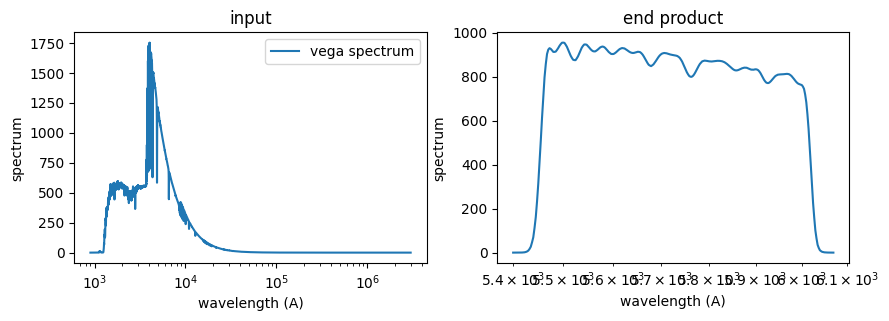

In [140]:
# plot some output from above 
fig, axs = plt.subplots(1,2, figsize=(10,3))
axs[0].plot(lam_vega, photlam_vega, label='vega spectrum')
axs[1].plot(lam_i, photlam_i)

axs[0].set_xscale('log')
axs[0].set_xlabel('wavelength (A)')
axs[0].set_ylabel('spectrum')
axs[0].set_title('input')
axs[0].legend()

axs[1].set_xlabel('wavelength (A)')
axs[1].set_ylabel('spectrum')
axs[1].set_xscale('log')
axs[1].set_title('end product')
axs[1].tick_params(axis='x', rotation=45)

plt.show()

#### cgisim_renormalize_spectrum():

Do the same as above for the target star of type a0v first:

#### cgisim_get_counts():

In [167]:
info_dir = "/Users/sammyh/Codes/cgisim_v3.1/cgisim/cgisim_info_dir/"
illuminated_area = 35895.212     # cm^2 -- Roman parameters
spectrum_file = 'a0v'
nd = 0
star_vmag = 5.04
ref_filter = 'V'
mode = 'excam'

lam, photlam_mag0 = cgisim.cgisim_read_spectrum( spectrum_file, info_dir ) # read in spectrum of target star
# step into renormalize_spectrum
# throughput already read in above
star_flux_mag0 = cgisim.cgisim_integrate_spectrum( lam, photlam_mag0, lam_bandpass, throughput_bandpass)
star_flux_mag0 # flux from target star

492178.0801659543

Text(0, 0.5, '')

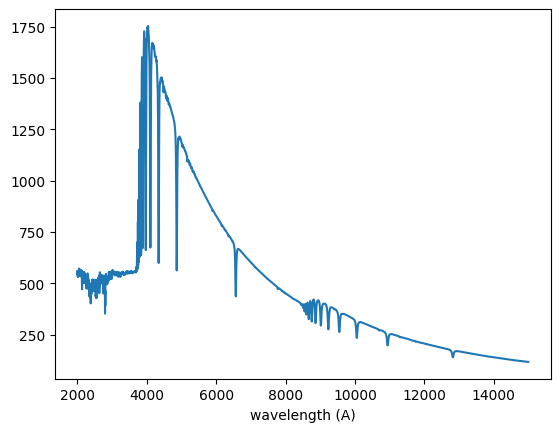

In [168]:
plt.plot(lam, photlam_mag0)
plt.xlabel('wavelength (A)')
plt.ylabel('')

In [142]:
# get flux ratio of target star
flux_ratio = 10.0**(-0.4 * star_vmag) # F/F_0 = 10^(-0.4 * m)
flux_ratio

0.009638290236239706

In [143]:
# TODO: comment
photlam_star = photlam_mag0 * vega_flux / star_flux_mag0 * flux_ratio # target star spectrum * vega flux / flux from target star * flux ratio of target star
photlam_star # end result: renormalized spectrum of target star
# end of renormalize_spectrum

array([5.24621972, 5.32178023, 5.40715994, ..., 1.12934425, 1.12645174,
       1.12412743])

Text(0, 0.5, 'throughput')

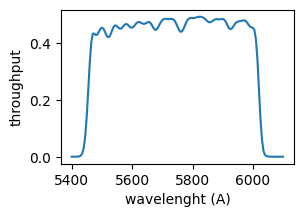

In [162]:
bandpass_name = '1'
lam_start_um = 0.540
lam_end_um = 0.610
bandpass = 'lam' + str(lam_start_um*1000) + 'lam' + str(lam_end_um*1000)

# Get throughput in bandpass
lam_system, throughput_system = cgisim.cgisim_roman_throughput(bandpass_name, bandpass, nd, mode, info_dir)
# plot throughput
plt.figure(figsize=(3,2))
plt.plot(lam_system, throughput_system)
plt.xlabel('wavelenght (A)')
plt.ylabel('throughput')

In [164]:
# get flux in bandpass
flux = cgisim.cgisim_integrate_spectrum(lam, photlam_mag0, lam_system, throughput_system) # [photons/cm^2/s over bandpass]
print('flux in bandpass: ', flux)
# flux over illuminated area
flux = flux * illuminated_area # [photons/s] OUTPUT OF CGISIM_GET_COUNTS
print('flux over illuminated area: ', flux)

flux in bandpass:  240633.69784493657
flux over illuminated area:  8637597598.487942


### Deep dive into cgisim_roman_throughput():
inputs: bandpass_name, bandpass, nd, mode, info_dir

output: lam, throughput (throughput as a function of wavelength)

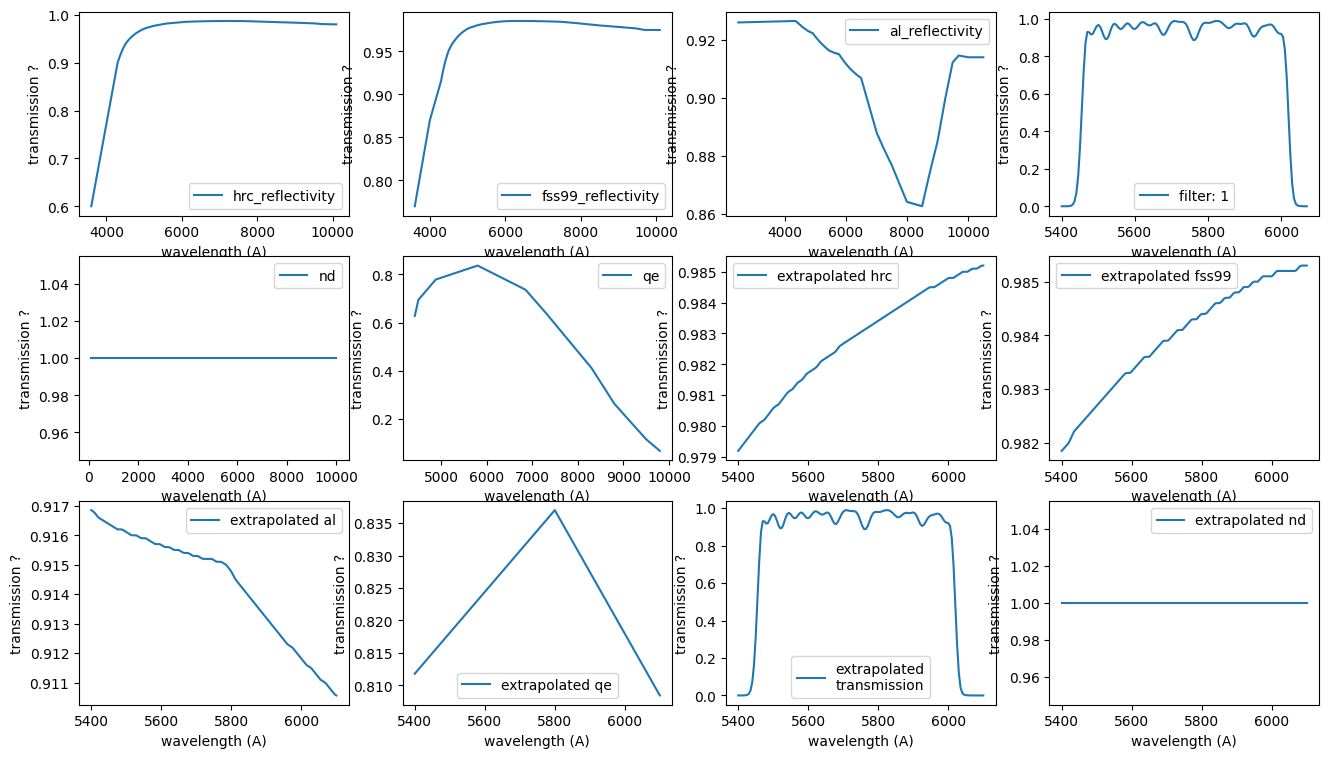

Text(0.5, 1.0, 'throughput after combining sources')

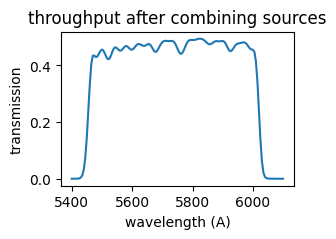

In [214]:
num_hrc = 7  # comments: optical and tertiary collimator assembly ? what is hrc ? why integer?
filter_name = bandpass_name

if mode == 'excam':
    num_al = 2 # DMs
    num_fss99 = 12 # CGI Mirrors (except DMs)
    num_glass = 0
    num_ar_glass = 3 # FMP, air-spaced imaging doublet
# there are others, but just testing code for excam now

fig, axs = plt.subplots(3, 4, figsize=(16,9))
# is this reflectivity as function of wavelength ? what is hrc, dfss99, al ?
lam_hrc, reflectance_hrc = cgisim.cgisim_read_throughput('hrc_reflectivity', info_dir)
dhrc = np.median( lam_hrc[1:] - lam_hrc[0:-1] ) # result: 13.5
axs[0,0].plot(lam_hrc, reflectance_hrc, label='hrc_reflectivity')

lam_fss99, reflectance_fss99 = cgisim.cgisim_read_throughput( 'fss99_reflectivity', info_dir )
dfss99 = np.median( lam_fss99[1:] - lam_fss99[0:-1] ) # result: 13.5
axs[0,1].plot(lam_fss99, reflectance_fss99, label='fss99_reflectivity')

lam_al, reflectance_al = cgisim.cgisim_read_throughput( 'al_reflectivity', info_dir )
dal = np.median( lam_al[1:] - lam_al[0:-1] ) # result: 13.5
axs[0,2].plot(lam_al, reflectance_al, label='al_reflectivity')

lam_filter, transmission_filter = cgisim.cgisim_read_throughput( 'filters/'+filter_name, info_dir )
dfilter = np.median( lam_filter[1:] - lam_filter[0:-1] )
axs[0,3].plot(lam_filter, transmission_filter, label='filter: '+filter_name)
    
if nd != 0:
    nd_str = str(int(np.rint(nd)))
    lam_nd, transmission_nd = cgisim.cgisim_read_throughput('filters/'+nd_str, info_dir )
    dnd = np.median( lam_nd[1:] - lam_nd[0:-1] )
else:
    lam_nd = np.array([100.0, 5000.0, 10000.0])
    transmission_nd = np.array([1.0, 1.0, 1.0])
    dnd = lam_nd[1] - lam_nd[0]
axs[1,0].plot(lam_nd, transmission_nd, label='nd')

if mode == 'lowfs':
    ccd_name = 'locam_emccd'
else:
    ccd_name = 'excam_emccd'
lam_ccd, qe_ccd = cgisim.cgisim_read_throughput( ccd_name, info_dir )
dccd = np.median( lam_ccd[1:] - lam_ccd[0:-1])
axs[1,1].plot(lam_ccd, qe_ccd, label='qe')

s = bandpass.split("lam") # get min + max wavelength for bandpass
min_lam = float(s[1]) * 10 # convert nm to angstroms
max_lam = float(s[2]) * 10
lam_bandpass = np.linspace(min_lam, max_lam, 17) # array across bandpass in 17 points
throughput_bandpass = np.ones(17) # array of 17 ones
dbandpass = lam_bandpass[1] - lam_bandpass[0] # "length" of bandpass
dlam = np.min( [dccd, dhrc, dal, dfss99, dfilter, dbandpass, dnd] ) # result: 5
nlam = int( (max_lam - min_lam ) / dlam + 1 ) # result: 141
lam = np.linspace( min_lam, max_lam, nlam)

f = interp1d( lam_hrc, reflectance_hrc, fill_value='extrapolate' )
reflectance_hrc = f( lam )
axs[1,2].plot(lam, reflectance_hrc, label='extrapolated hrc')

f = interp1d( lam_fss99, reflectance_fss99, fill_value='extrapolate' )
reflectance_fss99 = f( lam )
axs[1,3].plot(lam, reflectance_fss99, label='extrapolated fss99')

f = interp1d( lam_al, reflectance_al, fill_value='extrapolate' )
reflectance_al = f( lam )
axs[2,0].plot(lam, reflectance_al, label='extrapolated al')

f = interp1d( lam_ccd, qe_ccd, fill_value='extrapolate' )
qe_ccd = f( lam )
axs[2,1].plot(lam, qe_ccd, label='extrapolated qe')

f = interp1d( lam_filter, transmission_filter, fill_value='extrapolate' )
transmission_filter = f( lam )
axs[2,2].plot(lam, transmission_filter, label='extrapolated\ntransmission')

f = interp1d( lam_nd, transmission_nd, fill_value='extrapolate' )
transmission_nd = f( lam )
axs[2,3].plot(lam, transmission_nd, label='extrapolated nd')

for ax in axs.flat:
    ax.set(xlabel='wavelength (A)', ylabel='transmission ?')
    ax.legend()
plt.show()

throughput = qe_ccd * transmission_filter * transmission_nd * reflectance_hrc**num_hrc * reflectance_al**num_al * reflectance_fss99**num_fss99 * 0.99**num_ar_glass * 0.9**num_glass
plt.figure(figsize=(3,2))
plt.plot(lam, throughput)
plt.xlabel('wavelength (A)')
plt.ylabel('transmission')
plt.title('throughput after combining sources')

#### CGISim wrapper `compute_spectrum` method:
(This is called in `compute_EF` if the counts do not already exist in the cgisim_sims object)

In [24]:
source_id = 1

star_vmag = cgisim_obj.sources[source_id]['star_vmag']
star_type = cgisim_obj.sources[source_id]['star_type']

info_dir = cgisim.lib_dir + '/cgisim_info_dir/'
# Get bandpass information
# bandpass_data contains center wavelength, min and max wavelengths, and nlam 
mode_data, bandpass_data = cgisim.cgisim_read_mode( cgisim_obj.cgi_mode, cgisim_obj.cor_type, cgisim_obj.bandpass, info_dir )

# Set level of polarizer transmission if not set already
if cgisim_obj.polaxis != 10 and cgisim_obj.polaxis != -10 and cgisim_obj.polaxis != 0:
    polarizer_transmission = 0.45
else:
    polarizer_transmission = 1.0

nlam = bandpass_data["nlam"]
lam_um = np.linspace( bandpass_data["minlam_um"], bandpass_data["maxlam_um"], nlam ) # array of length nlam across min-max wavelengths in bandpass

nd = 0 # ND filter

dlam_um = lam_um[1] - lam_um[0] # difference between wavelength steps
counts_spectrum = []
for ilam in range(nlam):
    lam_start_um = lam_um[ilam] - 0.5 * dlam_um # starting wavelength
    lam_end_um = lam_um[ilam] + 0.5 * dlam_um   # end wavelength
    bandpass_i = 'lam' + str(lam_start_um*1000) + 'lam' + str(lam_end_um*1000) # individual bandpass
    # Return flux at detector in photons/s
    counts = polarizer_transmission * cgisim.cgisim_get_counts( star_type, cgisim_obj.bandpass, bandpass_i, nd, star_vmag, 'V', 'excam', info_dir )
    # total_counts += counts
    counts_spectrum.append(counts)

cgisim_obj.sources[source_id]['counts_spectrum'] = counts_spectrum
cgisim_obj.sources[source_id]['counts_spectrum']


[142685595.76510817,
 238535429.69940406,
 238544559.57449016,
 233779372.04648495,
 231654470.5033298,
 217476907.16263348,
 67199510.33311526]

In [41]:
batch = cgisim_obj.scene['schedule']['batches'][0]
batch

{'num_timesteps': 1830,
 'batch_ID': 0,
 'sourceid': 0,
 'exptime': 1.0,
 'V3PA': 0}